# Part 1 - Arda Dinc

            USD Curncy  EUR Curncy  GBP Curncy  JPY Curncy  AUD Curncy  \
Dates                                                                    
2019-08-14           1      1.1139      1.2060      105.91      0.6748   
2019-08-15           1      1.1107      1.2088      106.12      0.6775   
2019-08-16           1      1.1090      1.2149      106.38      0.6779   
2019-08-19           1      1.1078      1.2126      106.64      0.6764   
2019-08-20           1      1.1100      1.2170      106.23      0.6778   

            NZD Curncy  CAD Curncy  CHF Curncy  NOK Curncy  SEK Curncy  \
Dates                                                                    
2019-08-14      0.6436      1.3319      0.9732      8.9831      9.6338   
2019-08-15      0.6449      1.3313      0.9765      9.0209      9.6436   
2019-08-16      0.6429      1.3269      0.9783      9.0053      9.6648   
2019-08-19      0.6411      1.3324      0.9817      8.9784      9.6872   
2019-08-20      0.6416      1.3319   

/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_48445/1520562933.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(currency, (return_stats['Mean Return'][j], return_stats['Std Dev'][j]), fontsize=8)


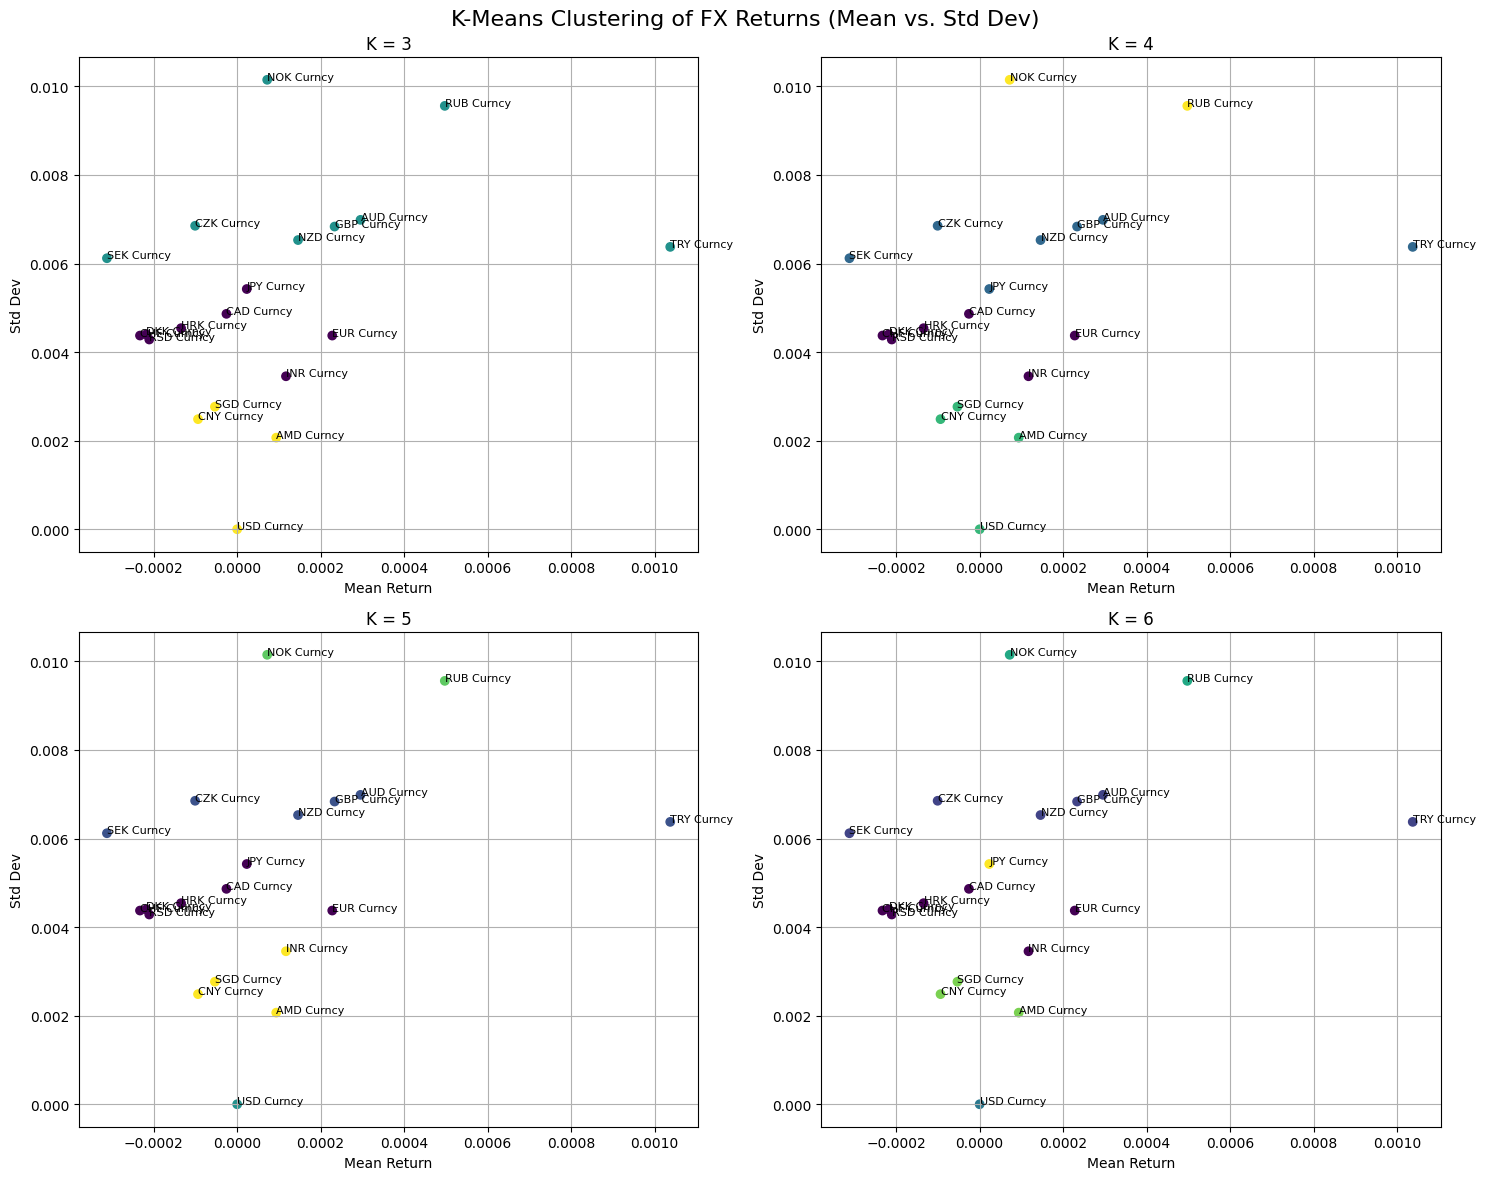

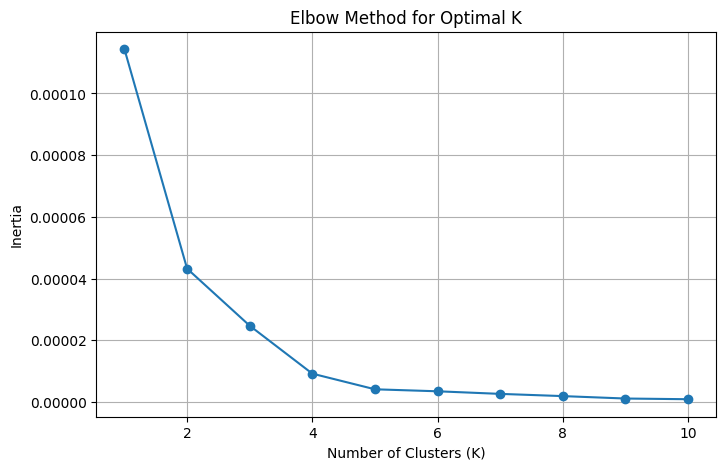

           Mean Return   Std Dev
Cluster_4                       
0            -0.000068  0.004327
1             0.000189  0.006446
2            -0.000013  0.001830
3             0.000285  0.009853


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# a. Import FX spot rates from Currencies_1y.xls.
# Load the data
file_path = 'Currencies_1yr.xlsx'
fx_data = pd.read_excel(file_path, index_col=0)

# Display the first few rows
print(fx_data.head())

# b. Calculate daily return.
# Calculate daily percentage returns
fx_returns = fx_data.pct_change().dropna()

# Display the first few rows of returns
print(fx_returns.head())

# c. Calculate mean return and stdev of return.
mean_returns = fx_returns.mean()
std_returns = fx_returns.std()

# Combine into a DataFrame for analysis
return_stats = pd.DataFrame({'Mean Return': mean_returns, 'Std Dev': std_returns})
print(return_stats)

# Prepare data for clustering (use mean and std dev as features)
X = return_stats.values

# d. Perform K means using K = 3,4,5,6.
k_values = [3, 4, 5, 6]
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    results[k] = kmeans.labels_

# Add cluster labels to the return_stats DataFrame
for k in k_values:
    return_stats[f'Cluster_{k}'] = results[k]

print(return_stats)

# e. Plot a 2x2 figure with scatter plots with each color representing a cluster and currency 
# label on the scatter plot. Visualization exercise — your opportunity to play with
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('K-Means Clustering of FX Returns (Mean vs. Std Dev)', fontsize=16)

# Plot for each K value
for i, k in enumerate(k_values):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    # Scatter plot with cluster colors
    scatter = ax.scatter(return_stats['Mean Return'], return_stats['Std Dev'], c=return_stats[f'Cluster_{k}'], cmap='viridis')
    
    # Annotate each point with the currency label
    for j, currency in enumerate(return_stats.index):
        ax.annotate(currency, (return_stats['Mean Return'][j], return_stats['Std Dev'][j]), fontsize=8)
    
    ax.set_title(f'K = {k}')
    ax.set_xlabel('Mean Return')
    ax.set_ylabel('Std Dev')
    ax.grid(True)

plt.tight_layout()
plt.show()

# f. Use elbow method discussed in class plus qualitative argument to recommend # of clusters.
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Analyze cluster traits for the chosen K (e.g., K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
return_stats[f'Cluster_{k}'] = kmeans.labels_

# Group by cluster and analyze mean and std dev
cluster_traits = return_stats.groupby(f'Cluster_{k}')[['Mean Return', 'Std Dev']].mean()
print(cluster_traits)

Cluster Traits:
Low Mean, Low Risk Cluster (Safe Haven):

USD, CNY, AMD, SGD are consistently grouped together in a cluster characterized by relatively low mean returns and low volatility. This indicates stability and a "safe haven" trait of these currencies.
Specifically, USD and CNY consistently have the lowest volatility, marking them as potentially safe currencies.

TRY, RUB, and NOK are currencies clustered with higher mean returns but significantly higher volatility (standard deviation). These currencies represent riskier investment opportunities but offer potentially higher returns.

A mid-range cluster, often including currencies like AUD, NZD, GBP, EUR, JPY, CAD, typically offers moderate risk and returns. They are usually grouped closely, reflecting their similar risk-return profiles.
High Volatility Outliers:

The TRY currency is consistently an outlier with the highest mean returns and significant volatility, distinctly separated from others. This implies significant economic or political risk factors affecting its market behavior.

Optimal K Discussion (Elbow Method):
According to the elbow plot, the optimal number of clusters (K) appears at approximately 4 or 5 clusters, beyond which the inertia reduces minimally.

At K=4, you achieve a clear and interpretable grouping:

- Cluster 1 (Safe and low volatility): USD, CNY, AMD, SGD
- Cluster 2 (Moderate risk-return): EUR, GBP, AUD, NZD, CAD, JPY, CHF, and others
- Cluster 3 (High volatility and return): TRY, RUB
- Cluster 4 (High volatility but lower return): NOK
At K=5, the high-risk cluster splits further, adding detail to the analysis, but the interpretability may slightly reduce:

Safe haven cluster remains unchanged.
Moderate cluster splits into two smaller groups, slightly distinguishing regional or smaller volatility differences.

# Part 2

#### a.) Read http://www.ledoit.net/honey.pdf, https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance.  Write 2 sentences on your understanding of the methodology.

Ledoit-Wolf Shrinkage combines the sample covariance matrix with a structured target to reduce estimation error. The shrinkage intensity is optimized to minimize the mean squared error (MSE) between the true and estimated covariance matrices.

OAS (Oracle Approximating Shrinkage) is a refined version of Ledoit-Wolf that assumes Gaussian data and computes a more optimal shrinkage coefficient, further lowering MSE under normality.

In [ ]:
import numpy as np
from sklearn.covariance import LedoitWolf, OAS

# b.) Create a 1000x20 matrix “X” from random normal dist.  
# Create new matrix X* that is a copy of X.  
# Replace last two columns with first column with 1e-4 random normal noise added to it. 
np.random.seed(42)
X = np.random.randn(1000, 20)

# Create X* by replacing last two columns with noisy copies of the first column
X_star = X.copy()
noise = 1e-4 * np.random.randn(1000, 2)  # Tiny Gaussian noise
X_star[:, -2:] = X[:, [0]] + noise  # Last two columns ≈ first column + noise

# Sample covariance matrices
Sigma = np.cov(X, rowvar=False)
Sigma_star = np.cov(X_star, rowvar=False)

# Condition numbers
cond_Sigma = np.linalg.cond(Sigma)
cond_Sigma_star = np.linalg.cond(Sigma_star)

print(f"Condition Number (Original X): {cond_Sigma:.2f}")
print(f"Condition Number (Noisy X*): {cond_Sigma_star:.2e}")

def shrink_covariance(data, estimator):
    model = estimator().fit(data)
    return model.covariance_

# c.) Calculate the covariance matrix of X and X* (Sigma, Sigma*) and the corresponding condition number.
Sigma_LW = shrink_covariance(X, LedoitWolf)
Sigma_OAS = shrink_covariance(X, OAS)

Sigma_star_LW = shrink_covariance(X_star, LedoitWolf)
Sigma_star_OAS = shrink_covariance(X_star, OAS)

# d.) Shrink covariace matrix using OAS and Ledoit and Wolf.  
# Calculate the condition number after shrinkage.
cond_LW = np.linalg.cond(Sigma_LW)
cond_OAS = np.linalg.cond(Sigma_OAS)
cond_star_LW = np.linalg.cond(Sigma_star_LW)
cond_star_OAS = np.linalg.cond(Sigma_star_OAS)

print(f"Shrunk (LW) Condition (X): {cond_LW:.2f}")
print(f"Shrunk (OAS) Condition (X): {cond_OAS:.2f}")
print(f"Shrunk (LW) Condition (X*): {cond_star_LW:.2f}")
print(f"Shrunk (OAS) Condition (X*): {cond_star_OAS:.2f}")

#### e.) One sentence on the difference between the two.
OAS assumes Gaussian data and optimizes shrinkage intensity for minimal MSE under normality, while Ledoit-Wolf is distribution-agnostic and uses a different target matrix, often resulting in slightly different regularization.



# Part 3

Daily Returns:
                  AGG       TLT       IEF       LQD       XLB       XLE  \
Date                                                                     
2017-09-19 -0.000546 -0.002458 -0.001119  0.000579  0.005144  0.004083   
2017-09-20 -0.000820  0.000715 -0.001960 -0.001240  0.003529  0.006778   
2017-09-21 -0.000182 -0.000556 -0.001309  0.000000 -0.002110  0.000299   
2017-09-22  0.000729  0.002861  0.001779  0.001324 -0.003524  0.005085   
2017-09-25  0.002369  0.006260  0.002991  0.003720  0.001768  0.014435   

                 XLF       XLI       XLK       XLP       XLU       XLV  \
Date                                                                     
2017-09-19  0.007582  0.001003  0.004422 -0.003074 -0.002030 -0.007872   
2017-09-20  0.005941  0.007301 -0.004064 -0.009614 -0.007396  0.000977   
2017-09-21  0.002362  0.002985 -0.005441 -0.009524 -0.000186 -0.005122   
2017-09-22 -0.001178  0.002551  0.000513 -0.002959 -0.008198  0.000000   
2017-09-25 -0.001180 

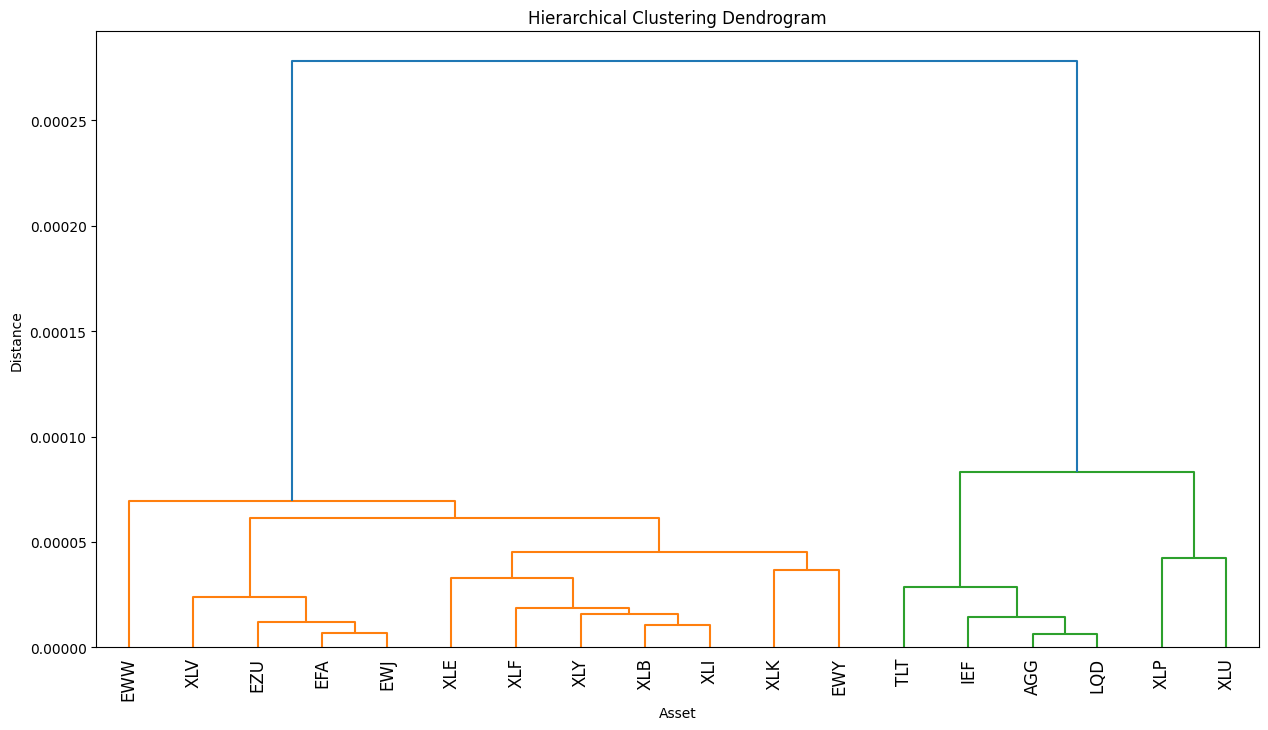

HRP Weights:
 EWW    0.018998
XLV    0.040461
EZU    0.034280
EFA    0.045991
EWJ    0.035520
XLE    0.017366
XLF    0.017380
XLY    0.002719
XLB    0.002546
XLI    0.028505
XLK    0.019624
EWY    0.025649
TLT    0.107836
IEF    0.175269
AGG    0.376995
LQD    0.048913
XLP    0.001016
XLU    0.000933
dtype: float64


/var/folders/r6/0smcfgt9415gwpc747f7ghth0000gn/T/ipykernel_48445/1848457000.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.21526072 0.21526072 0.21526072 0.21526072 0.21526072 0.21526072
 0.21526072 0.21526072 0.21526072]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[sub1] *= alpha


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.covariance import OAS

# Load data
file_path = 'index_prices (1).csv'
prices = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# a. Calculate Daily Returns
returns = prices.pct_change().dropna()
print("Daily Returns:\n", returns.head())

# b. Calculate covariance matrix
sample_cov = returns.cov()
cond_sample = np.linalg.cond(sample_cov)
print(f"Condition Number (Sample Covariance): {cond_sample:.2f}")

# с. Calculate condition number
# d. Use OAS, calculate condition number
oas = OAS().fit(returns)
oas_cov = oas.covariance_
cond_oas = np.linalg.cond(oas_cov)
print(f"Condition Number (OAS Covariance): {cond_oas:.2f}")

# Compute correlation matrix from OAS covariance
corr_matrix = pd.DataFrame(oas_cov, index=returns.columns, columns=returns.columns)
corr_matrix = (corr_matrix + corr_matrix.T) / 2  # Ensure symmetry

# Convert correlation to distance matrix
distance_matrix = np.sqrt(0.5 * (1 - corr_matrix))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix.values, method='ward')

# e. Perform agglomerative clustering
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, labels=returns.columns, leaf_rotation=90)
plt.xlabel('Asset')
plt.ylabel('Distance')
plt.show()

def get_hrp_weights(cov, linkage_matrix):
    # f. Plot Dendrogram - describe the different clusters.
    order = dendrogram(linkage_matrix, no_plot=True)['leaves']
    sorted_cov = cov.iloc[order, order]
    
    # Recursive bisection
    weights = pd.Series(1, index=sorted_cov.index)
    clusters = [sorted_cov.index.tolist()]
    
    while len(clusters) > 0:
        cluster = clusters.pop(0)
        if len(cluster) == 1:
            continue
        
        # Split cluster into two sub-clusters
        mid = len(cluster) // 2
        sub1 = cluster[:mid]
        sub2 = cluster[mid:]
        
        # Compute variance of each sub-cluster
        var1 = sorted_cov.loc[sub1, sub1].sum().sum()
        var2 = sorted_cov.loc[sub2, sub2].sum().sum()
        
        # Assign weights inversely proportional to variance
        alpha = 1 - var1 / (var1 + var2)
        weights[sub1] *= alpha
        weights[sub2] *= (1 - alpha)
        
        clusters += [sub1, sub2]
    
    return weights / weights.sum()

# g. Get HRP weights using provided functions.
hrp_weights = get_hrp_weights(pd.DataFrame(oas_cov, index=returns.columns, columns=returns.columns), linkage_matrix)
print("HRP Weights:\n", hrp_weights)